# Linear Systems and Condition Numbers
## <font color='blue'> 선형시스템과 조건수

In [1]:
%matplotlib inline

## The problem
### <font color='blue'>문제

We are interested in solving linear systems of equations which we write in the form

<font color='red'>우선 아래와 같은 선형시스템(**linear system**)을 푸는 것을 생각해 봅시다.</font>

\begin{equation}
  A {\bf x} = {\bf b},
\end{equation}

where $A$ is a known matrix, ${\bf b}$ a known vector, and ${\bf x}$ is the unknown solution vector that we are trying to find. By convention the system has size $n$ - that is, the matrix has size $n \times n$ and the vectors are column vectors length $n$.

<font color='red'>여기서 $A$ 는 행렬, ${\bf b}$ 는 벡터, 그리고 ${\bf x}$ 는 우리가 구하고자 하는 벡터입니다. 따라서, 주어진 시스템의 크기는 $n$이므로, 행렬의 크기는 $n \times n$ 이고 열 벡터는 길이는 $n$이 됩니다.</font>

Before attempting to solve the linear system, we recall that not all linear systems can be solved. If the matrix is singular, which is equivalent to $\det(A) = 0$, then the matrix cannot be inverted, and there is no solution. 

<font color='red'>선형 시스템을 다루기 전에, 우리는 "모든 선형 시스템을 풀 수는 없다는 것"을 알아야 합니다. 주어진 행렬이 특이(singular)행렬일 때, 즉 $\det(A) = 0$ 와 같이 주어졌을때 역행렬이 존재하지 않기 때문에 해는 존재하지 않습니다.

Now consider the accuracy with which the coefficients of $A$ and ${\bf b}$ can be known. Real numbers cannot be stored on a computer to infinite precision, so the coefficients cannot be accurate beyond, for example, 16 significant figures. In most interesting cases even this is too optimistic: the coefficients of $A$ and ${\bf b}$ will usually be the result of some other numerical or experimental procedure with its own inherent inaccuracies.

<font color='red'>이제 얼마나 정확히 $A$ 와 ${\bf b}$ 의 계수를 알아낼 수 있는지 알아봅시다. 실수(**Real Number**)는 컴퓨터에서 무한 정밀도로 인식 되지 못하기 때문에, 그래서 계수도 그 이상으로 정확할 수 없습니다. 예를 들어, 보통의 컴퓨터가 최대 16개의 유효숫자까지 정확성을 보장하지 못한다는 사실이 그 예입니다. 하지만 대부분 이 유효숫자도 많다고 할 수 있습니다: $A$ 와 ${\bf b}$ 의 계수는 정확성의 한계를 가지는 제3의 수치적 혹은 실험적 절차에서 나오는 결과로부터 정해질 것입니다.</font>

This implies one crucial point. There may be linear systems defined by $\left( A, {\bf b} \right)$ that we do not want to solve, as it is _impossible_ to be sure that the solution is sufficiently accurate. That is, a "small" change in the coefficients of e.g. $A$, can lead to a "large" change in the solution. We would usually interpret "small" to mean within the accuracy with which we know the coefficients. What "large" means depends on the accuracy we require on the solution, and is problem dependent.

<font color='red'>이것은 중요한 점을 지적합니다. 정확한 해답을 보장할 수 없다는 이유로 우리가 계산하기 원치 않는 $\left( A, {\bf b} \right)$ 선형 시스템도 존재할 수 있다는 것입니다. 예를 들어 $A$ 계수의 "작은" 오차로 인해서 해답에 "큰" 오차가 생길 수도 있습니다. 여기서 "작은" 오차는 우리가 아는 계수 안에서의 정확도고, "큰" 오차는 해답에서 요구하는 정확도에 따르며 이것은 주어진 문제에 따라 다릅니다.</font>

If the linear system does have a reliable solution - that is, small changes in the coefficients lead to small changes in the solution - we call it **well conditioned**. If it does not, we call it **badly conditioned**. If the linear system is badly conditioned then it cannot be reliably solved: find a different problem.

<font color='red'>선형 시스템이 해답을 가지는 경우 계수의 작은 오차가 해답에 작은 오차를 야기합니다. 우리는 이것을 **well conditioned**이라 부르고, 그렇지 아니할 때는 **badly conditioned** 이라고 일컫는다. 선형 시스템이 **badly conditioned**일 경우에는 정확한 해답을 찾을수 없으므로 다른 방법을 찾아야 합니다.</font>

## Condition Numbers

### <font color='blue'> 조건수

We cannot, practically, solve not just one linear system, but many neighbouring problems, just to check if the system is reasonable. Instead we want a simple criterion that we can cheaply check to see whether it is worth solving the linear system. We can condense this down to a single number, called the **condition number**.

<font color='red'> 실제로 시스템이 올바른지 확인하려고 하나가 아닌 여러 개의 선형시스템 문제들을 풀 수는 없습니다. 대신 주어진 선형시스템의 해답을 찾을 가치가 있는지 간단하게 확인할 수 있는 기준이 있습니다. 이 기준은 **조건수** 라는 단일한 숫자입니다.</font>

### Determinants
#### <font color='blue'>행렬식

Why not use the determinant as the condition number? After all, if the determinant is zero the matrix cannot be inverted. However, consider the following matrix:

<font color='red'> 행렬식(determinant)의 값이 0 일때 역행렬이 존재하지 않기에 행렬식을 조건수로 지정할 수는 없습니다. 하지만 아래 표기된 행렬을 참고해 봅시다.</font>

\begin{equation}
  A = 10^{-1} \begin{pmatrix} 1 & 0 & \dots & 0 \\ 0 & 1 & \ddots & \vdots \\ \vdots & \ddots & \ddots & 0 \\ 0 & \dots & 0 & 1 \end{pmatrix}.
\end{equation}

This diagonal matrix is trivially inverted and perfectly well behaved, no matter how large. However, $\det(A) = 10^{-n}$, which is arbitrarily small for sufficiently large $n$. So the determinant cannot be a good condition number.

<font color='red'> 위 대각선 행렬은 크기와 상관없이 쉽게 역행렬을 구할 수 있고 완벽하게 구동합니다. 하지만 $\det(A) = 10^{-n}$ 은 충분히 $n$이 클 때 작게 됩니다. 따라서 행렬식은 올바른 조건수가 되지 못합니다.</font>

### Perturbations
#### <font color='blue'>섭동 방정식

Instead, let us consider what happens if we perturb the coefficients. For simplicity, just perturb the coefficients of the matrix. We do this by considering the matrix $A + \epsilon F$, where $F$ is some arbitrary matrix and $\epsilon$, assumed small, is the "size" of the perturbation. Now the solution will depend on the perturbation: write the solution as ${\bf x}(\epsilon)$. So the problem we are looking to solve is
<font color='red'> 대신 계수를 섭동하면 어떻게 되는지 봅시다. 풀이 과정을 줄이기 위해, 행렬의 계수를 섭동니다.
우리는 그렇기 위해서 $A + \epsilon F$ 를 행렬로 정하고 ($F$ 는 무작위한 행렬 그리고 $\epsilon$ 은 작다고 가정) 섭동의 "크기"로 볼수 있습니다. 이제 해답은 섭동에 따라 다릅니다. 해답을 ${\bf x}(\epsilon)$ 으로 지정하고 우리가 풀어야할 문제는 다음과 같습니다. </font>

\begin{equation}
  \left( A + \epsilon F \right) {\bf x}(\epsilon) = {\bf b}.
\end{equation}

We are interested in how much the solution changes as we vary $\epsilon$, or in particular the difference between the "true" solution (when $\epsilon = 0$) and the perturbed solution. Using Taylor expansion (about $\epsilon = 0$) we can write
<font color='red'> 여기서 우리가 알고자 하는것은 $\epsilon$ 값의 변동이 해답 값에 미치는 정도, 혹은 "참"해답 ($\epsilon = 0$ 일때) 과 섭동의 해답의 차이 입니다. $\epsilon = 0$ 을 가정할때 테일러 전개식을 이용해 우리는 다음과 같이 씁니다.</font>

\begin{equation}
  {\bf x}(\epsilon) - {\bf x}(0) = \epsilon \left. \dot{\bf x} \right|_{\epsilon = 0} + {\cal O} \left( \epsilon^2 \right).
\end{equation}

Going back to the definition of the problem we see
<font color='red'> 문제 요점으로 되돌아가서 보았을때, </font>

\begin{align}
  && \left( A + \epsilon F \right) \dot{\bf x} + F {\bf x} & = 0 \\
  \implies && \left. \dot{\bf x} \right|_{\epsilon = 0} &= - A^{-1} F {\bf x}(0) + {\cal O} \left( \epsilon \right).
\end{align}

Therefore the *absolute* error induced by the perturbation is
<font color='red'> 그러므로 섭동방정식에 의해 유발된 *절대*오차는, </font>

\begin{equation}
  {\bf x}(\epsilon) - {\bf x}(0) = -\epsilon A^{-1} F {\bf x}(0) + {\cal O} \left( \epsilon^2 \right).
\end{equation}

More interesting is the size of the relative error, which is
<font color='red'> 여기서 참고할것은 아래와 같은 상대적 오류입니다.</font>

\begin{equation}
  \frac{\| {\bf x}(\epsilon) - {\bf x}(0) \|}{\| {\bf x} \|} \sim \epsilon \| A^{-1} F \| \sim \| A^{-1} \| \| A \| \left( \epsilon \frac{\| F \|}{\| A \|} \right).
\end{equation}

The final form groups the terms into those we know, or can control (which is just the matrix $A$), and those we do not (the terms corresponding to the perturbation, which are $\epsilon$ and $F$). The unknown terms are also scaled to be dimensionless by "dividing" the unknown $F$ by the known $A$.
<font color='red'> 최종 형식은 기지항이나 바꿀수있는것 (행렬 $A$) 과 그렇지 않는것 (섭동 방정식에 해당되는 $\epsilon$,$F$) 으로 분류가 됩니다.  미지항은 미지 $F$ 를 기지 $A$ 로 나눌때 무한의 값으로 측정이됩니다. </font>

This final form gives us our condition number: it is the piece that we can calculate
<font color='red'> 다음 최종형식은 계산 할수있는 조건수를 줍니다.</font>

\begin{equation}
  K(A) = \| A^{-1} \| \| A \|.
\end{equation}

However, we have not yet determined how to compute the "magnitude" or "norm" of a matrix, $\| A \|$.
<font color='red'> 하지만 우리는 아직 $\| A \|$ 행렬의 "크기(**magnitude**)"와 "노름(**norm**)"의 계산법을 알지 못합니다.

## Vector and matrix norms
### <font color='blue'>벡터와 행렬 노름

### Vector norms
#### <font color='blue'>벡터 노름

A norm is a mathematical distance function. Standard norms for e.g. real vectors use the sizes of the components or the "length" of the vector. The most useful for our purposes are the $1, 2$- and $\infty$-norms:
<font color='red'> 노름(**norm**)은 거리 함수 입니다. 표준적인 노름의 예시에서 실벡터는 구성 요소의 크기나 벡터의 "길이(**length**)"를 사용합니다. </font>

\begin{align}
  \| x \|_{1} & = \sum_{j = 1}^n | x_j |, \\
  \| x \|_{2} & = \sqrt{\sum_{j = 1}^n ( x_j )^2}, \\
  \| x \|_{\infty} & = \max_{j} | x_j |.
\end{align}

For example, the $2$-norm is the "standard" Pythagorean distance.
<font color='red'> 예를들어, $2$-norm 은 피타고라스 길이의 "표준(**standard**)"입니다.

Note that different norms give different answers when applied to the *same* vector. For example, if ${\bf x} = (-1, 2, 1)$ then
<font color='red'> 여기서 주의할것은 같은 벡터에 다른 노름을 대입하면 다른 해답을 줍니다. 예를 들어 ${\bf x} = (-1, 2, 1)$ 일때, </font>

\begin{align}
  \| x \|_{1} & = |-1| + |2| + |1| && = 4, \\
  \| x \|_{2} & = \sqrt{(-1)^2 + (2)^2 + (1)^2} && = \sqrt{6}, \\
  \| x \|_{\infty} & = \max_{j} \left(|-1|, |2|, |1| \right) && = 4.
\end{align}

Hence, when comparing norms of different vectors, it is necessary to always use the same norm.
<font color='red'> 그러므로, 다른 벡터들의 노름을 비교 할때는 같은 노름을 사용하는것이 필수입니다.

As an illustration of the different norms, let us restrict to 2 dimensional vectors (which are easy to visualize) and plot all vectors with norm 1 for each of these three norms.
<font color='red'> 여러 노름들의 예시를 위해, 시각화가 쉬운 2차원 벡터로 제한후 3개의 다른 노름에 각각 norm 1 을 대입해봅시다.

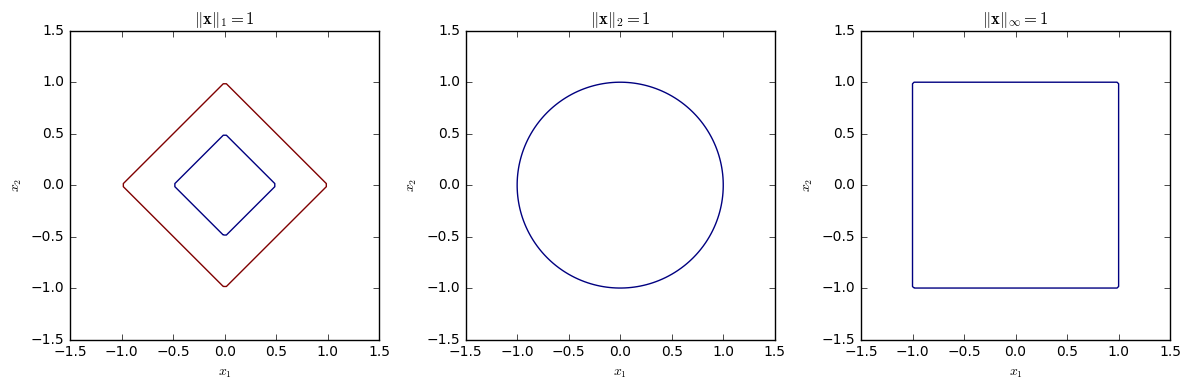

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

x1 = np.linspace(-1.5, 1.5, 100)
x2 = x1
[X, Y] = np.meshgrid(x1, x2)

N1   = np.zeros_like(X)
N2   = np.zeros_like(X)
Ninf = np.zeros_like(X)

for i in range(len(x1)):
    for j in range(len(x1)):
        v = np.array([x1[i], x2[j]])
        N1[i, j]   = la.norm(v, 1)
        N2[i, j]   = la.norm(v, 2)
        Ninf[i, j] = la.norm(v, np.inf)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.contour(X, Y, N1, levels = [1])
plt.title(r"$\| {\bf x} \|_{1} = 1$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.subplot(1, 3, 2)
plt.contour(X, Y, N2, levels = [1])
plt.title(r"$\| {\bf x} \|_{2} = 1$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.subplot(1, 3, 3)
plt.contour(X, Y, Ninf, levels = [1])
plt.title(r"$\| {\bf x} \|_{\infty} = 1$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.tight_layout(pad = 1.0)

plt.show()

### Matrix Norms
#### <font color='blue'>행렬 노름

We really want matrix norm, $\| A \|$. We can use any vector ${\bf y}$ combined with any vector norm to *induce* a matrix norm by defining
<font color='red'> 우리는 행렬 노름 $\| A \|$ 을 원합니다. 아래에서 벡터 ${\bf y}$ 와 벡터 노름을 합치면 행렬 노름 을 *결합*(**induce**)할수 있음을 증명합니다. </font>

\begin{equation}
  \| A \|_{\bf y} = \| A {\bf y} \|
\end{equation}

where the norm on the right hand side is a vector norm. Of course, this definition depends on the choice of vector ${\bf y}$. So we could maximize over *all* vectors ${\bf y}$: however, the size of the norm depends on the size of the vector. Therefore we want to take the magnitude of the vector ${\bf y}$ out: we define the **induced matrix norm** as
<font color='red'> 오른편의 노름이 벡터 노름입니다. 당연히 이것은 벡터 ${\bf y}$ 선택에 따라 다르기에, *모든* 벡터 ${\bf y}$ 를 극대화 할수있습니다. 하지만 노름의 크기는 벡터의 크기에 따라 다릅니다. 그러므로 우리는 벡터 ${\bf y}$ 에서 크기를 제외하고 **결합된 행렬 노름** 을 아래와 같이 정의합니다. </font>   


\begin{equation}
  \| A \| = \max_{{\bf y}: \| {\bf y} \| = 1} \| A {\bf y} \|.
\end{equation}

Throughout this definition, all norms *must* be the same. For example, the matrix $2$-norm is given by
<font color='red'> 정의 동안에서는 모든 노름이 일정해야 합니다. 예를 들어, 행렬 $2$-norm 은 이렇게 주어집니다. </font>

\begin{equation}
  \| A \|_2 = \max_{{\bf y}: \| {\bf y} \|_2 = 1} \| A {\bf y} \|_2.
\end{equation}

Actually hand calculating the matrix norm using this definition is obviously difficult. However, it can be shown that two particular norms can be greatly simplified. That is
<font color='red'> 이와 같은 행렬 노름을 직접 계산하는것은 어렵습니다. 하지만, 아래의 예와 같이 두가지의 노름은 간략하게 바꿀수 있습니다. </font>

1. the matrix $1$-norm is given by the maximum of the $1$-norm of the *column* vectors of $A$;

    <font color='red'>1.행렬 $1$-norm 은 열(**column**)벡터 $A$ 의 최대 값 $1$-norm 으로부터 주어진다. </font>

2. the matrix $\infty$-norm is given by the maximum of the $1$-norm of the *row* vectors of $A$.

    <font color='red'>2.행렬 $\infty$-norm 은 행(**row**)벡터 $A$ 의 최대 값 $1$-norm 으로부터 주어진다. </font>

Note that, in contrast to everything else in this section, the $1$-norm is used for the vectors in both cases.

<font color='red'>다른 부분에서 다룬것과 달리 $1$-norm 은 두 경우의 벡터에 모두 사용됬음을 참고합시다. </font>

## Condition number
### <font color='blue'>조건수

Formally we now have all the tools needed to compute our condition number. Again the condition number depends on the norm used in its calculation, but we would expect that all results have a similar magnitude.
<font color='red'> 이제 조건수(**condition number**)를 계산하기 위한 핵심적인 요소들이 준비됬습니다. 다시 강조하지만, 조건수는 계산에서 사용된 노름에 따라 다릅니다. 하지만 결과는 항상 비슷하다고 예상할수 있습니다. </font>

Loosely we interpret the condition number to measure *the amount that inverting the matrix will increase any intrinsic error in the coefficients*.
<font color='red'> 우리는 예측된 조건수를 이용하여 계수의 고유오차(**intrinsic error**)를 높이는 *역행렬을 이루는 값*을 측정할수 있습니다. </font>

More precisely, we can look at the relative error that we can measure: the *weighted residual*
<font color='red'> 정확히 말해, 상대적 오류(**relative error**)를 통해 우리는 *가중잔여치(**weighted residual**)* 를 측정합니다. </font>

\begin{equation}
  {\cal E} = \frac{\| A {\bf x}_{\text{num}} - {\bf b}\|}{\| {\bf b} \|}.
\end{equation}

Here ${\bf x}_{\text{num}}$ is the numerical solution. In principle, the weighted residual could be minimized, but we can never guarantee that it is precisely zero.
<font color='red'> 여기서 ${\bf x}_{\text{num}}$ 가 수치 햇법입니다. 정의적으로, 가중잔여치를 최소화 할수있지만 절대로 0 으로 확신을 할수 없습니다.. </font>

Now, it can be shown that
<font color='red'> 따라서, 이와같이 나타냅니다. </font>

\begin{equation}
  \frac{1}{K(A)} {\cal E} \le \frac{\| {\bf x}_{\text{num}} - {\bf x}_{\text{exact}} \|}{\| {\bf x}_{\text{exact}} \|} \le K(A) {\cal E}.
\end{equation}

The lower bound is not important here: the point is the upper bound. Assume we have minimized the weighted residual to, for example, $10^{-16}$. Then, if the condition number is $\sim 10^{15}$ then the best bound on the relative error is $\sim 0.1$: in other words, we can only guarantee the correctness of the *first* significant digit of our solution!
<font color='red'> 여기서 핵심은 하계(**lower bound**)가 아닌 상계(*upper bound**)입니다. 가중잔여치를 $10^{-16}$ 로 최소화로 가정하고 조건수가 $\sim 10^{15}$ 일때, 상대적인 오류에 가장 적합한 경계는 $\sim 0.1$ 입니다. 다른 의미로, 우리는 첫 소수점까지만의 정확성을 나타낼수 있습니다.